# Polynomial Interpolation – Exercise sheet 2

TMA4130/TMA4135 Høst 2023

## Lagrange interpolation

Remember how we can implement the cardinal functions and do the Lagrange interpolation:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

Problem 2
c)

In [3]:
# THIS FUNCTION HAS TO BE COMPLETED CREATING THE CARDINAL FUNCTIONS
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        # ADD CODE HERE
        li = 1
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                # ADD CODE HERE
                li *= (x - xdata[j])/(xdata[i] - xdata[j])
        l.append(li)            # Append the array to the list            
    return l

In [4]:
def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by `cardinal(xdata, x)`
    Return: An array with the interpolation polynomial (evaluated at `x`). 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly += ydata[i]*l[i]  
    return poly

## Problem 2
### c)

Interpolation points of the given function in the given x-values: [0.25   0.0625 0.0625 0.25  ]
Max error on [-1,2] = 0.032
Max error on [-5,5] = 67108861.125


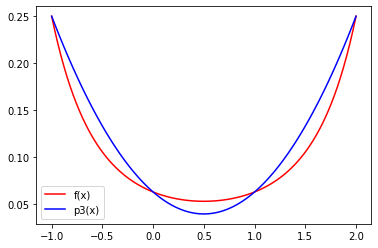

In [9]:
# Function to interpolate
def f(x):
    return 2.0**((x**2)-x-4)

# Lagrange interpolation algorithm
def lagrange_interpolation(f, xdata, x):
    l = cardinal(xdata, x)      # Cardinal functions
    ydata = f(xdata)            # y-values of the interpolation points
    poly = lagrange(ydata, l)   # Interpolation polynomial
    return poly

xdata = np.array([-1, 0, 1, 2])
ydata = f(xdata)
x_values = np.linspace(-1, 2, 4)

interpolated_values = lagrange_interpolation(f, xdata, x_values)

print(f'Interpolation points of the given function in the given x-values: {interpolated_values}') 

# Calculate the maximal error on the interval [-1, 2] and [-5, 5]
x1 = np.linspace(-1, 2, 100)
x2 = np.linspace(-5, 5, 100)

e_x1 = np.abs(lagrange_interpolation(f, xdata, x1) - f(x1))
e_x2 = np.abs(lagrange_interpolation(f, xdata, x2) - f(x2))

max_error_x1 = np.max(e_x1) 
max_error_x2 = np.max(e_x2)

print("Max error on [-1,2] =", max_error_x1.round(3))
print("Max error on [-5,5] =", max_error_x2.round(3))

# Plotter f(x) og p(x) på intervallet [-1,2]
plt.plot(x1, f(x1), label='f(x)', color = 'r')
plt.plot(x1, lagrange_interpolation(f, xdata, x1), label='p3(x)', color = 'b')

plt.legend()
plt.show()


### d)

In [20]:
def cheb_nodes(a, b, n): 
    k = np.arange(n)
    z_k = np.cos((np.pi / 2)*((2*k+1)/n))
    return ((a+b)/2) + ((b-a)/2)*z_k
print("The Chebyshev nodes on the interval are:\n", chebNodes(-1,2,3))

The Chebyshev nodes on the interval are:
 [ 1.79903811  0.5        -0.79903811]


### e)

Max error on [-1,2] = 0.042
Max error on [-5,5] = 66419269.327


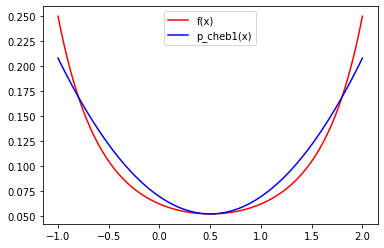

In [21]:
n = 3
a, b = -1, 2
c, d = -5, 5

x_cheb1 = cheb_nodes(a, b, n)
p_cheb1 = lagrange_interpolation(f, x_cheb1, x1)

x_cheb2 = cheb_nodes(c, d, n)
p_cheb2 = lagrange_interpolation(f, x_cheb2, x2)

error1 = np.abs(p_cheb1 - f(x1))
error2 = np.abs(p_cheb2 - f(x2))

print("Max error on [-1,2] =", np.max(error1).round(3))
print("Max error on [-5,5] =", np.max(error2).round(3))

plt.plot(x1, f(x1), label='f(x)', color='r')
plt.plot(x1, p_cheb1, label='p_cheb1(x)', color='b')
plt.legend()
plt.show()


### f)

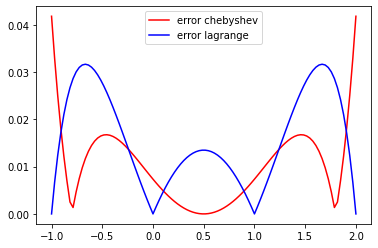

In [22]:
plt.plot(x1, error1, label='error chebyshev', color='r')
plt.plot(x1, e_x1, label='error lagrange', color='b')
plt.legend()
plt.show()

## Problem 3

### a) Interpolating $x(t)$

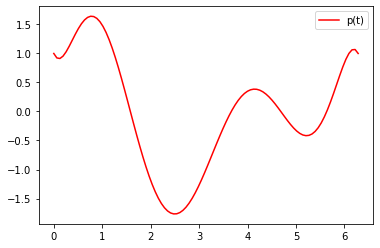

In [23]:
# Interpolation data
tdata = np.array([0, 0.8976, 1.7952, 2.6928, 3.5904, 4.488, 5.3856, 6.2832])
xdata = np.array([1, 1.5984, -0.6564, -1.6828, -0.1191, 0.2114, -0.3514, 1])
    
# Grid points for plotting
t = np.linspace(0,tdata[-1],100)

# Do the interpolation for the x coordinates here
# the final polynomial should be called
def lagrange_poly(xdata, tdata, t):
    l = cardinal(tdata, t)      # Cardinal functions
    ydata = xdata               # y-values of the interpolation points
    poly = lagrange(ydata, l)   # Interpolation polynomial
    return poly
px = lagrange_poly(xdata, tdata, t)

# and plot it here ...
plt.plot(t, px, label='p(t)', color='r')
plt.legend()
plt.show()

### b) Interpolating $y(t)$

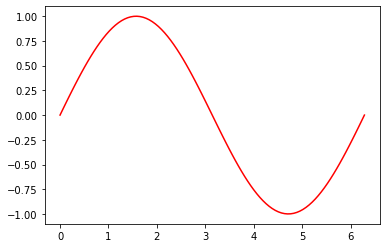

In [24]:
# Now do the same for the y coordinate...
ydata = np.array([0,0.7818, 0.9750, 0.4339, -0.4339, -0.975, -0.7818, 0])

# the final polynomial should be called
py = lagrange_poly(ydata, tdata, t)

# and plot it here ...
plt.plot(t, py, label='p(t)', color='r')
#Hint: you can re-use the "li" already computed, since the cardinal functions depend only on tdata, not on xdata!

### c) Trajectory

The trajectory of a particle moving in $\mathbb{R}^2$ is the locus of all $(x,y)$ points traveled by the particle. Therefore, all we have to do is plot the interpolation of $x$ against the interpolation of $y$.

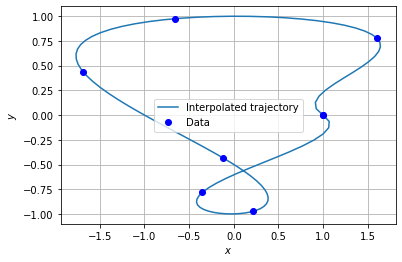

In [25]:

# If your polynomial in x is called px, Create your plot here
plt.plot(px, py, xdata, ydata,'ob')
plt.legend(['Interpolated trajectory', 'Data'])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)

### d) Find the exact values and compare

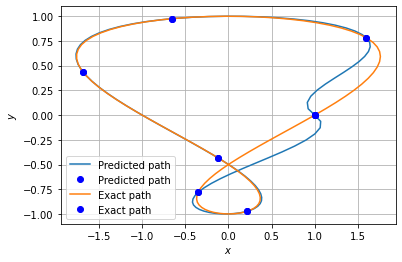

In [26]:
# Compute the exact values
xdata_exact = np.cos(t) + np.sin(2*t) 
ydata_exact = np.sin(t)

# Plot here both trajectories
plt.plot(px, py, xdata, ydata, 'ob', label='Predicted path') 
plt.plot(xdata_exact, ydata_exact, xdata, ydata, 'ob', label='Exact path') 
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend()
plt.show()
# It looks like since the exact trajectory is not a polynomial, the interpolation polynomial does not fit that well.